# Dataset: Viviendas de Boston, incluido en sklearn
Índice<a name="indice"></a>  
* [1 XGBoost todas las variables con el DF sin tratar](#2) 
* [2 XGBoost todas las variables con el DF sin outliers, sin correlaciones y normalizado](#3) 
* [3 XGBoost todas las variables con GridSearchCV](#4) 
* [4 Conclusión final](#5) 

In [24]:
# LIBRERÍAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación
from scipy import stats
# Normalización
from sklearn.preprocessing import StandardScaler

# Librería xgboost
#!pip install xgboost
import xgboost as xgb

# Métricas de evaluación
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Partición en entrenamiento y test
from sklearn.model_selection import train_test_split

# GridSearchCV para ahjsutar hiperparámetros
from sklearn.model_selection import GridSearchCV

# Dataset Viviendas de Boston
from sklearn.datasets import load_boston

# mis funciones
import funciones as mf
import misFunc as mf2

In [2]:
# Cargar el dataset
boston = load_boston()

C:\Users\Profesor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df=pd.concat([df,pd.DataFrame(boston['target'],columns=['Price'])],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# Filas y columnasdf.
df.shape

(506, 14)

In [7]:
#Nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
# Tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# Esta variables debería ser categórica
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [10]:
# Trasnformamos a categórica
df['CHAS'] = pd.Categorical(df['CHAS'])

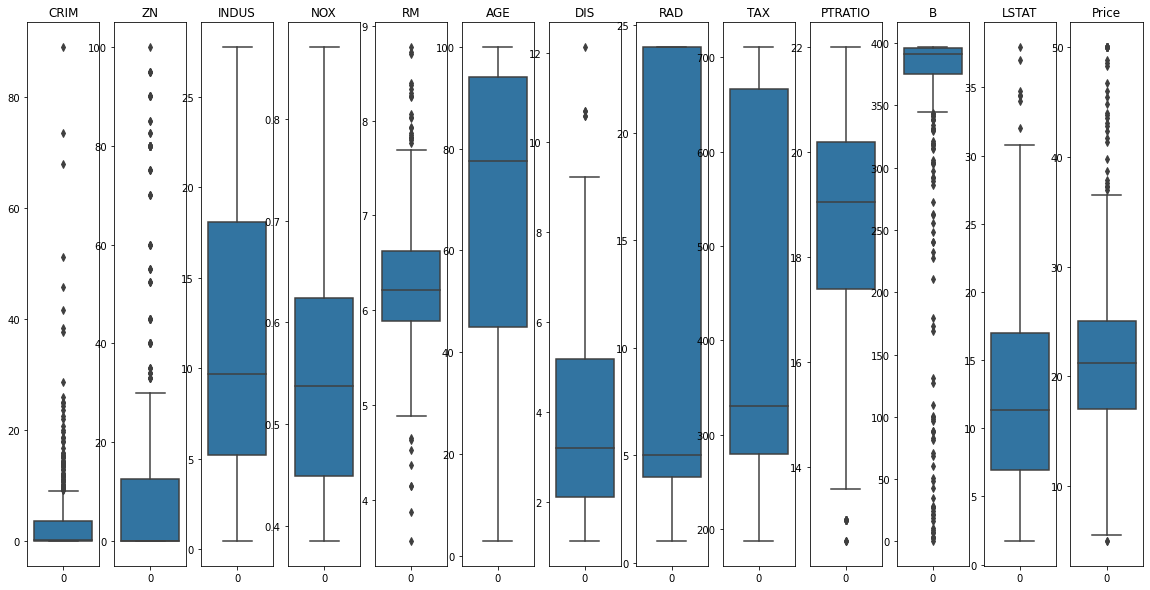

In [11]:
# Outliers - Pintar cajas y bigotes de variables numericas
dfNum = df.select_dtypes(include='float64').copy()


plt.subplots(sharex=False, sharey=False, figsize=(20,10))
for i in range(len(dfNum.columns)):
    # Crear subgráfica
    ax = plt.subplot(1,len(dfNum.columns),i+1)
    # Mostrar gráfica
    sns.boxplot(data=dfNum.iloc[:,i],ax = ax)
    # Título de la gráfica es la columna
    ax.set_title(dfNum.columns[i])

In [12]:
# Quitamos el precio para no quitar outliers de esta columna
dfNum.drop('Price',axis=1,inplace=True)
#Quitar outliers   
dfNum = mf.quitarOutliers(dfNum)

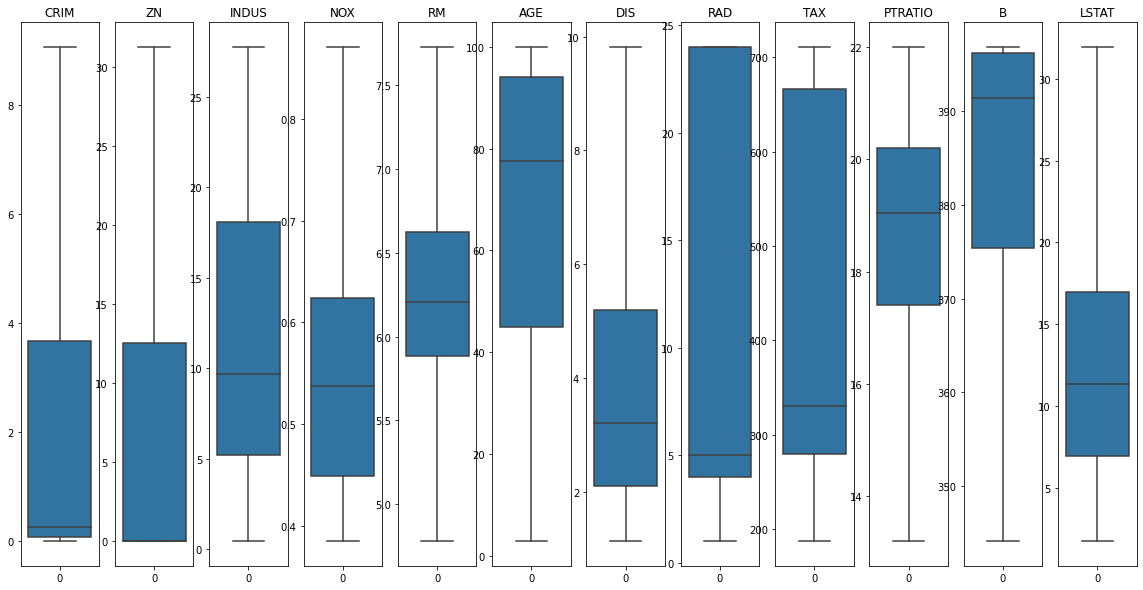

In [13]:
plt.subplots(sharex=False, sharey=False, figsize=(20,10))
for i in range(len(dfNum.columns)):
    # Crear subgráfica
    ax = plt.subplot(1,len(dfNum.columns),i+1)
    # Mostrar gráfica
    sns.boxplot(data=dfNum.iloc[:,i],ax = ax)
    # Título de la gráfica es la columna
    ax.set_title(dfNum.columns[i])

<AxesSubplot:>

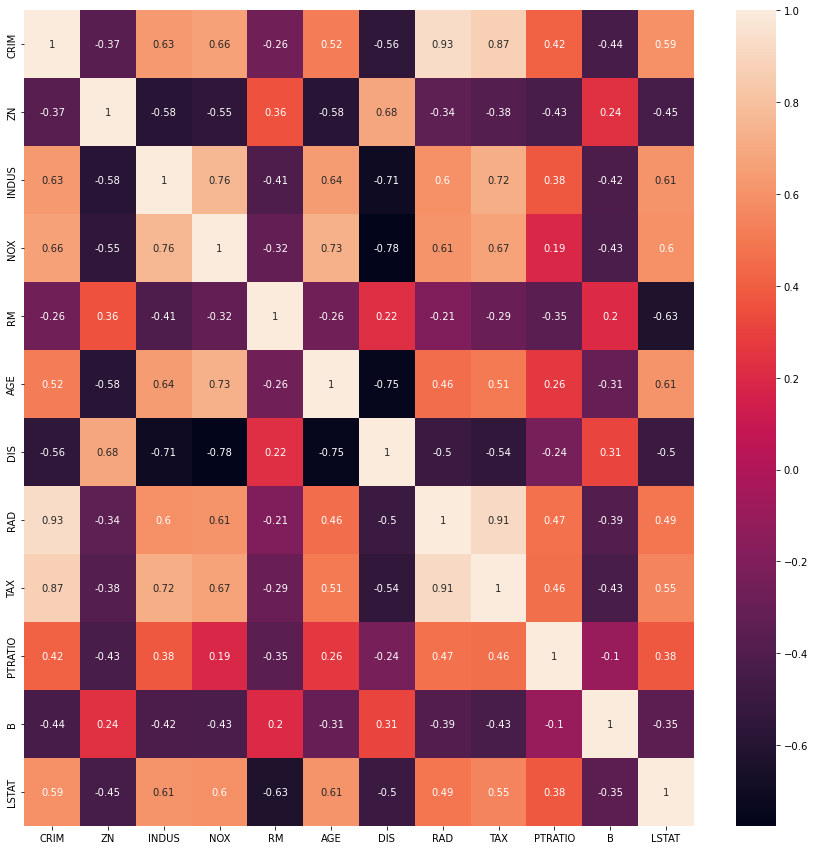

In [14]:
# Correlación
plt.figure(figsize=(15,15))
sns.heatmap(dfNum.corr(),annot=True)

In [15]:
# Probar con multicolinealidad (VIF > 10)
DfVif = mf2.seleccionarPorVIF(dfNum,10)
DfVif

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [16]:
dfNum=DfVif

In [17]:
# Normalización
for c in dfNum.columns:
    # Calculamos shapiro test
    stat, pvalor = stats.shapiro(dfNum[c])
    if(pvalor>0.05):
        print(f"La variable {c} PROVIENE de una distribución normal: PVALUE->{pvalor}")
    else:
        print(f"La variable {c} NO PROVIENE de una distribución normal: PVALUE->{pvalor} ")
    

La variable CRIM NO PROVIENE de una distribución normal: PVALUE->1.7975565573226355e-30 
La variable ZN NO PROVIENE de una distribución normal: PVALUE->5.855361807398424e-33 
La variable INDUS NO PROVIENE de una distribución normal: PVALUE->1.0642289039786765e-17 
La variable NOX NO PROVIENE de una distribución normal: PVALUE->5.775851259944009e-14 
La variable RM NO PROVIENE de una distribución normal: PVALUE->1.5714314827164344e-07 
La variable AGE NO PROVIENE de una distribución normal: PVALUE->2.230570069931666e-18 
La variable DIS NO PROVIENE de una distribución normal: PVALUE->3.700617463382584e-17 
La variable TAX NO PROVIENE de una distribución normal: PVALUE->1.1629678554442183e-23 
La variable PTRATIO NO PROVIENE de una distribución normal: PVALUE->2.233452173980954e-17 
La variable B NO PROVIENE de una distribución normal: PVALUE->1.193256889735755e-27 
La variable LSTAT NO PROVIENE de una distribución normal: PVALUE->1.4969853156555912e-13 


In [18]:
# Normalizar con StandarScaler
modelo = StandardScaler()
dfNorm = modelo.fit_transform(dfNum)
dfNorm

array([[-0.67029001,  0.91842034, -1.2879095 , ..., -1.4771812 ,
         0.78698807, -1.08874875],
       [-0.66394877, -0.57947069, -0.59338101, ..., -0.30994139,
         0.78698807, -0.49530164],
       [-0.66395481, -0.57947069, -0.59338101, ..., -0.30994139,
         0.57318348, -1.22427153],
       ...,
       [-0.65384327, -0.57947069,  0.11573841, ...,  1.18412558,
         0.78698807, -0.99459609],
       [-0.63909135, -0.57947069,  0.11573841, ...,  1.18412558,
         0.60575322, -0.87476542],
       [-0.6578764 , -0.57947069,  0.11573841, ...,  1.18412558,
         0.78698807, -0.67504764]])

In [19]:
dfNorm = pd.DataFrame(dfNorm,columns=dfNum.columns)
dfNorm

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.670290,0.918420,-1.287909,-0.144217,0.475982,-0.120013,0.148015,-0.666608,-1.477181,0.786988,-1.088749
1,-0.663949,-0.579471,-0.593381,-0.740262,0.231390,0.367166,0.572202,-0.987329,-0.309941,0.786988,-0.495302
2,-0.663955,-0.579471,-0.593381,-0.740262,1.444822,-0.265812,0.572202,-0.987329,-0.309941,0.573183,-1.224272
3,-0.662420,-0.579471,-1.306878,-0.835284,1.147817,-0.809889,1.101820,-1.106115,0.110265,0.667741,-1.379766
4,-0.651339,-0.579471,-1.306878,-0.835284,1.384468,-0.511180,1.101820,-1.106115,0.110265,0.786988,-1.038819
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.653278,-0.579471,0.115738,0.158124,0.504571,0.018673,-0.631298,-0.803212,1.184126,0.529057,-0.419694
502,-0.658523,-0.579471,0.115738,0.158124,-0.246676,0.288933,-0.723719,-0.803212,1.184126,0.786988,-0.503861
503,-0.653843,-0.579471,0.115738,0.158124,1.112875,0.797449,-0.781754,-0.803212,1.184126,0.786988,-0.994596
504,-0.639091,-0.579471,0.115738,0.158124,0.823812,0.736996,-0.674679,-0.803212,1.184126,0.605753,-0.874765


In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## XGBoost

# 1 XGBoost para todas las variables con df sin normalizar<a name="2"></a>
[Índice](#indice)

In [29]:
# Transformar CHAs a tipo numérica, ya que el modelo tiene problemas con las variables categóricas
df['CHAS'] = pd.to_numeric(df['CHAS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [30]:
# Separamos las variables independientes de la variable objetivo
x = df.columns
x = x.drop('Price')
x

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
# Dividir en datos de entremnamiento y de test
x_train,x_test, y_train, y_test = train_test_split(df[x],df['Price'],train_size=0.80,random_state=42)

In [32]:
# Crear el modelo con parámetros por defecto
modelo = xgb.XGBRegressor()
#entrenamos
modelo.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
# Evaluar predicciones en train
y_train_predict = modelo.predict(x_train)
# Mostrar métricas
print(f"MSE TRAIN:{mean_squared_error(y_train,y_train_predict)}")
print(f"R2 TRAIN:{r2_score(y_train,y_train_predict)}")

MSE TRAIN:0.0004029000393923251
R2 TRAIN:0.9999953622164942


In [34]:
# Evaluar predicciones en test
y_test_predict = modelo.predict(x_test)
# Mostrar métricas
print(f"MSE TEST:{mean_squared_error(y_test,y_test_predict)}")
print(f"R2 TEST:{r2_score(y_test,y_test_predict)}")

MSE TEST:6.560527271813469
R2 TEST:0.9105388132305845


In [86]:
# Análisis del resultado: Mejora los resultados respecto al random forest y no hay un sobreajuste.

In [47]:
# Crear el modelo con parámetros modificados
modelo = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.9, reg_lambda = 0.9, reg_alpha=0.9)
#entrenamos
modelo.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
# Evaluar predicciones en train
y_train_predict = modelo.predict(x_train)
# Mostrar métricas
print(f"MSE TRAIN:{mean_squared_error(y_train,y_train_predict)}")
print(f"R2 TRAIN:{r2_score(y_train,y_train_predict)}")

MSE TRAIN:0.007509981872961048
R2 TRAIN:0.99991355257718


In [49]:
# Evaluar predicciones en test
y_test_predict = modelo.predict(x_test)
# Mostrar métricas
print(f"MSE TEST:{mean_squared_error(y_test,y_test_predict)}")
print(f"R2 TEST:{r2_score(y_test,y_test_predict)}")

MSE TEST:13.030209698755923
R2 TEST:0.822316412201602


In [90]:
# Análisis del resultado: El resultado ha empeorado un poco debido a que hemos subido el valor
# de learning_rate, con lo que empeora el resultado

# 3 XGBoost para todas las variables con df normalizado <a name="3"></a>
[Índice](#indice)

In [51]:
# Separamos las variables independientes de la variable objetivo
x = dfNorm.columns
x

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [52]:
# Dividir en datos de entremnamiento y de test
x_train,x_test, y_train, y_test = train_test_split(dfNorm[x],df['Price'],train_size=0.80,random_state=42)

In [53]:
# Crear el modelo
modelo = xgb.XGBRegressor(n_estimators=100, max_depth=10,learning_rate=0.9, reg_lambda = 0.9, 
                          reg_alpha=0.9)
#entrenamos
modelo.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:
# Evaluar predicciones en train
y_train_predict = modelo.predict(x_train)
# Mostrar métricas
print(f"MSE TRAIN:{mean_squared_error(y_train,y_train_predict)}")
print(f"R2 TRAIN:{r2_score(y_train,y_train_predict)}")

MSE TRAIN:0.010781091063367729
R2 TRAIN:0.9998758988299331


In [55]:
# Evaluar predicciones en test
y_test_predict = modelo.predict(x_test)
# Mostrar métricas
print(f"MSE TEST:{mean_squared_error(y_test,y_test_predict)}")
print(f"R2 TEST:{r2_score(y_test,y_test_predict)}")

MSE TEST:14.016527617694656
R2 TEST:0.8088667048984559


In [96]:
# Análisis del resultado:
# Tal y como dice la teoría, no hay mucha diferencia entre el modelo del df original y el normalizado. El resultado es
# casi el mismo, incluso el resultado con el df normaliza es un poquito peor.

# 4 XGBoost con GridSearchCV <a name="4"></a>
[Índice](#indice)

In [56]:
# Crear el diccionario con los valores de los parámetros con los que queremos entrenar
parametros ={
    'n_estimators':[100,200,500],    
    'max_depth':[5,10,15],
    'eta':[0.1,0.3,0.5], #learning rate
    'lambda':[0.2,0.4,0.8],
    'alpha':[0.3,0.5,0.7]
}


In [57]:
# Crear modelo
modelo = GridSearchCV(xgb.XGBRegressor(),parametros)

In [58]:
%%time
# Entrenar modelo
modelo.fit(x_train,y_train)

CPU times: total: 15min 15s
Wall time: 4min 17s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [59]:
# ¿Cuál ha sido la mejor combinación de parámetros?
modelo.best_params_

{'alpha': 0.5, 'eta': 0.3, 'lambda': 0.4, 'max_depth': 5, 'n_estimators': 100}

In [60]:
# Predecir en train
y_train_pred = modelo.best_estimator_.predict(x_train)
# Mostrar métricas
print(f"MSE TRAIN:{mean_squared_error(y_train,y_train_pred)}")
print(f"R2 TRAIN:{r2_score(y_train,y_train_pred)}")

MSE TRAIN:0.00891417398342053
R2 TRAIN:0.9998973889177801


In [61]:
# Predecir en test
y_test_pred = modelo.best_estimator_.predict(x_test)
# Mostrar métricas
print(f"MSE TEST:{mean_squared_error(y_test,y_test_pred)}")
print(f"R2 TEST:{r2_score(y_test,y_test_pred)}")

MSE TEST:7.065904155987929
R2 TEST:0.9036473525368194
